<a href="https://colab.research.google.com/github/NikolayLenkovNikolaev/Inferential_Statistics/blob/main/L3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## COnfidence Intervals

- Previously, we discussed creating a confidence interval using the CLT
- now we discuss the creation of better confidence intervals for small samples using Gosset's t distribution
- to discuss the t distribution we must discuss the Chi-squared distribution
- throughout we use the following general procedure for creating CIs
a. create a Pivot or statistic that does not depend on the parameter of interest
b. solve the probability that the pivot lies betweenbounds for the parameter



## Chi-squared distribution
- suppose that $S^2$ is the sample variance from a collection of iid N(\mu, \sigma^2) data then
$$\frac{(n-1)S^2}{\sigma^2} \sim Χ_{n-1}^2$$

which reads: follows a Chi=squared distribution with n-1 degree of freedom
- che Chi-squared distribution is skewed and has support on 0 to $\infty$
- the mean of the Chi-squared is its degrees of freedom
- the variance of the Chi-squared distribution is twice the degree of freedom

$$E[S^2]= \sigma^2 -> E[\frac{(n-1)S^2}{\sigma^2}]= (n-1)$$



### COnfidence interval for the variance
- Note that if $\chi_{n-1, \alpha}^2$ is the $\alpha$ quantile of the Chi-squared distribution then

$1-\alpha = P(\chi_{n-1,\alpha/2}^2 =, \frac{(n-1)S^2}{\sigma^2} =< \chi_{n-1,1-\alpha/2}^2)$

$P(\frac{(n-1)S^2}{\chi_{n-1, 1-\alpha/2}^2 =< \simga^2 =< (n-1)S^2}{\chi_{n-1, \alpha/2}^2})$

So that:

$[\frac{(n-1)S^2}{\chi_{n-1, 1-\alpha/2}} ; \frac{(n-1)S^2}{\chi_{n-1, \alpha/2}}]$

is a $100(1-\alpha)$% confidence interval for $\sigma^2$



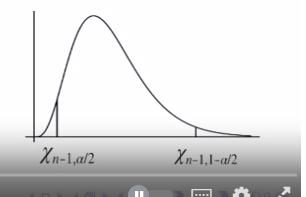

NOTES about this interval

- this interval relies heavily on the assumed normality
- square-rooting the endpoints yields a Ci for $\sigma$
- it turns out that:
  - $(n-1)S^2 \sim Gamma((n-1)/2 ; 2\sigma^2)$

which reads: follows a gamma distribution with shape (n-1)/2 and scale $2\sigma^2$

-Therefore, this can be used to plot a likelihood function for $\sigma^2$

Example: a recent study 513 of organo-lead manufacturing workers reported an average total brain volume of 1.150.315 cm^3 with standard deviation of 105.977. Assuming normally of the underlying measurements, caluclate a confidence interval for the population variation in total brain volume.

```
# Ci for the variance
s2 <- 105977^2
n<- 513
alpha <-0.05

qtiles <- qchisq(c(alpha/2, 1-alpha/2), n-1)

ival <- rev((n-1)*s2/qtiles)
# intervl for the sd
sqrt(ival)


# Plot the likelihood
sigmaVals <- seq(90, 120, length=1000)
likeVals <- dgamma((n-1)*s2, shape = (n-1)/2, scale = 2*sigmaVals^2)

likeVals <- likevals/max(likevals)
plot(sigmavals, likevals, type="l")
lines(range(sigmavals[likevals >=1 /8]), c(1/8, 1/8))

lines(range(sigmavals[likevals >= 1/16]), c(1/16, 1/16))
```

## Student's t Distributin and CI for Normal Means

Invented by William Gosset under the pseuodnym Student in 1908
- ha thicker tails that the normal
- is indexed by a defrees of freedom, gets more like a t.normal as df gets larger
- is obtained as
$\frac{Z}{\sqrt{\frac{\chi^2}{df}}}$

where Z and  $\chi^2$ are independent standard normals and Chi-squared disribution respectively

Result:
- suppose that ($X_1...X_n$) are iid $N(\mu, \sigma^2)$ then:
a. $\frac{\bar{X}-\mu}{\sigma/\sqrt{n}}$ is standard normal
b. $\sqrt{\frac{(n-1)S^2 }{\sigma^2 (n-1) }}= S/\sigma$ ios the square root of a Chi-squared divided by its df

Therefore:
$$ \frac{\frac{\bar{X}-\mu}{\sigma/\sqrt{n}}}{S/\sigma} = \frac{\bar{X}-\mu}{S/\sqrt{n}}$$

follows Gosset's t distribtion with n-1 degrees of freedom



Confidence Intervals for the mean:

- notice that the t-statistics is a pivot, therefore we use it to create a confidence interval for $\mu$
- let $t_{df,\alpha}$ be the $\alpha^{th}$ quantile of the t distribution with df degrees of freedom

$$1-\alpha = P(-t_{n-1, 1-\alpha/2} =< \frac{\bar{X}-\mu}{S/\sqrt{n}} =< t_{n-1, 1-\alpha/2}) $$

$$=P(\bar{X}- t_{n-1, 1-\alpa/2} S/\sqrt{n} =< \mu =< \bar{X}+ t_{n-1, 1-\alpa/2} S/\sqrt{n}) $$

- interval is $\bar{X} -+ t_{n-1; 1-\alpha/2} S/\sqrt{n}$

Note about the t-interval

- the t interval techncally assumes that the idea are iid normal, though it is robust to this assumption
- it workds well whenever the distribution of the data is roughtly symnmetric and mound shaped
- paired observations are often analyzed using the t interval by taking differences
- for large dagrees of freedom, t quantiles become the same as standard normal quantiles, therefore this interval converges to the same interval as the CLT ielded.
- for skewed distribution, the spirit of the t interval assumprions are violatd
- also for skewed distribution it doesn't make a lot of sense to center the interval at the mean
- in this case, consider taking logs or using a different summary like the median
- for highly discrete data, like binary, other intervals are available

Sleep Data:
- in R typing data(sleep) brings up the sleep data originally analyzed in Gosset's Bometrika paper, which shows the increase in hours for 10 patients on tow soporific drugs. R treats the data as two groups rather than paired


```
data(sleep)
g1 <= sleep$extra[1:10]
g2 <- sleep$extra[11:20]
difference <- g2-g1
mn <- mean(diference) #1.67
s <- sd(difference)#1.13
n<-10
mn+c(-1,1)* qt(0.975, n-1)*s /sqrt(n)
t.test(difference)$conf.int

```

The non-central t-distribution
- if X is $N(\mu, \sigma^2)$ and $\chi^2$ is a Chi-squared random variable with df defrees of freedom then $\frac{X/\sigma}{\sqrt{\frac{\chi^2}{df}}}$ is called a **non-central** t random cariable with non-centrality parameter $\mu/\sigma$

- note that:
a. $\bar{X}$ is $N(\mu,\sigma^2/n)$
b. $(n-1)S^2/\sigma^2$ is Chi-squared with n-1 df
- then $\sqrt{n}\bar{X}/S$ is non-central t with non-centrality parameterr $\sqrt{n}\mu/\sigma$
- we can use this to create a likelihood for $\mu/\sigma$ , the **effect size**
```
sStat<- sqrt(n)* mn/s
esVals <- seq(0,1, lenght=1000)
likVal;s <- dt(tStat, n-1, ncp=sqrt(n)* esVals)
likVals <- likVals /max(likVals)
plot(esVals, likVals, type = "l")
lines(range(esVals[likeVals>1/8]), c(1/8, 1/8))
lines(range(esVals[likeVals>1/8]), c(1/16, 1/16))
```


The profile likelihood

- to obtain a likelihood for $\mu$ alone, the preferred method is called **profiling**
- the profile likelihood gets its name because tthe result is like the shadow you would get if you were to hine a light on the two -dimensional likelihood for $\mu$ and $\sigma$

- the profile likelihood for parameter value $\mu_0$ is obtained by maximizing the joint likelihood for $\sigma$ with $\mu$ fixed at $\mu_0$
- this process is repeated for lots of value of $\mu_0$

Calculating the profile likelihood:
- the joint likelihood with $\mu$ fixed at $\mu_0$ is

$$ \∝ ∏_{i=1}^n [(\sigma^2)^{-1/2} exp[-(x_i - \mu_0)^2 /2\sigma^2]$

$$= (\sigma^2)^{-n/2} exp(-\sum_{i=1}^n (x_i - \mu_0)^2 /2\sigma)$$

- with $\mu_0$ fixed, the maximum likelihood estimator for $\sigma^2$ is $\sum_{i=1}^n (x_i - \mu_0)^2 /n$

- Plugging this back into the likelihood we get:

$$(\sum_{i=1}^n (x_i - \mu_0)/n)^{-n/2} exp(-n/2)$$

Therefire, removing multiplicative constants, the profile likelihood is

$$(\sum_{i=1}^n (x_i - \mu)^2)^{-n/2}$$

Note that this is clearly maximized at $\mu= \bar{X}$, the same as the Ml estimate for $\mu$ for the complete likelihood

$$\frac{(\sum_{i=1}^n (x_i - \mu)^2)^{-n/2}}{(\sum_{i=1}^n (x_i - \bar{x}^2)^{-n/2}}$$


```
muVals <- seq(0,3, lenght=1000)
likVals <- sapply(muVals, fimction(mu){
  (sum((difference-mu)^2)) /
  sum((difference- mn)^2) ^ (-n/2)
})
plot(muVals, likVals, type="l")
lines(range(muVals[likVals > 1/8]), c(1/8, 1/8))
lines(range(muVals[likVals > 1/16]), c(1/16, 1/16))
```

### COnfidence Interval

Independent group t confidence intervals
- suppose that we want to compare the mean blood pressure betwee two groups in a random trial, those wo received the treatment to those who received a placebo.

- we cannot use the paired t tet because the groups are independent and may have different sample sizes.
- we now present methods for comparing independent groups


Notation:
- let $X_1..X_{n_x}$ be IID $N(\mu_x, \sigma^2)$
- let $Y_1..Y_{n_y}$ be IID $N(\mu_y, \sigma^2)$
- let $\bar{X}, \bar{Y}, S_x, S_y$ be the means and standard deviations
- using the fact that linear combinations of normals are again normal , we know that $\bar{Y}- \bar{X}$ is also normal with mean $\mu_y - \mu_x$ and varinace $\sigma^2(\frac{1}{n_x} + \frac{1}{n_y})$

- the poled variance estimator
$$S_p^2= [(n_x-1)S_x^2 + (n_y-1)S_y^2] / (n_x + n_y -2)$$

$S_p^2 = \pi.S_x^2 + (1-\pi)S_y^2$ where $\pi = \frac{n_x-1}{n_x + n_y -2}$

is a good estimator for $\sigma$



The [pp;ed estimator is amixture of the group variance, placing greater weight on whichever has a larger sample size
- if the sample sizes are the same the pooled variance estimate is the average of the group variance
- the pooled estimator is unbaiased

$E[S_p^2] = \frac{(n_x-1)E[S_x^2]+ (n_y -1)E[S_y^2]}{n_x + n_y -2}$

$\frac{(n_x-1)\sigma^2 + (n_y-1)\sigma^2}{n_x + n_y -2}$

The pooled bariance estimate is independent of $\bar{Y}-\bar{X}$ since $S_x$ is independent of $\bar{X}$ and $S_y$ is independent of $\bar{Y}$ and the groups are independent

Reesult:
- the sum of two independent Chi-squared random variables is Chi-squared with degrees of freedom equal to the sum of the degrees of freedom of the summands

Therefoe:

$(n_x + n_y -2)S_p^2/\sigma^2 = (n_x-1)S_x^2/\sigma^2 + (n_y-1)S_y^2/\sigma^2= \chi_{n_x -1}^2 + \chi_{n_y-1}^2 = \chi_{n_x + n_y -2}^2$

Putting this all together:

The stastic:

$A = \frac{\bar{Y}- \bar{X} - (mu_y -\mu_x)}{\sigma(\frac{1}{n_x}+ \frac{1}{n_y})^{1/2}}$

$B = \sqrt{\frac{(n_x+n_y - 2)S_p^2}{(n_x + n_y -2)\sigma^2}}$

$$ \frac{A}{B}= \frac{\bar{Y}- \bar{X}- (\mu_y - \mu_x)}{S_p(\frac{1}{n_x}+\frac{1}{n_y})}$$
is a standard normal divided by te square root of an independent chi-suared diviation by its degrees of freedom
- therefore theis tatistic follows Gosset t-distribution with $n_x +n_y -2$ degrees of freedom
- notece the form is (estimator- true value)/ SE




Codifence Interval:
- therefore a $(1-\alpha)* 100$% confidence interval for $\mu_y- \mu_x $ is

$$\bar{Y} - \bar{X} -+ t_{n_x+ n_y-2, 1-\alpha/2} S_p (1/n_x + 1/n_y)^{1/2}$$

remember thi interval is asuming a constant variance across two groups
0 if there is some doubt, assume a different variance per group, which we eill dicuss later



Likelihood Method:

exactly as before:

$$\frac{}\bar{Y}-\bar{X}}{S_p(1/n_x + 1/n_y)^{1/2}}$$
follows a non-central t distribution with non-centrality parameter $\frac{\mu_y-\mu_x}{\sigma(1/n_x+1/n_y)^{1/2}}$

therefore we can use this statistic to creae a likelihood for $(\mu_y- \mu_x)/\sigma$ a standardized measure of the change in group means

Example:
- from Rosner Fundamentals of Biuostatistics, Page 304
- comparing SBP for 8 oral contraceptive users versus 21 controls
- $\bar{X}_{OC}= 132.86$ mmHg with $S_{oc}= 15.34$ mmHg
- $\bar{X}_c= 127.44$ mmHg with $S_c= 18.23$mmHg

Pooled variance estimate

$S_p^2= \frac{7(15.34)^2 + 20(18.23)^2}{8+21-2}= 307.8$

- $t_{27,0.975}= 2.052$ (in R , qt(0.975, df=27))

interval:

$132.86 - 127.44 -+ 2.052(307.8(1/8 + 121)^{1/2})= [-9.52, 20.36]$

Unequal Variance

Note that under unequal variances:

$\bar{Y}- \bar{X} \sim (\mu+y - \mu_x; \sigma_x^2 /n_x + \sigma_y^2/n_y)$

The statistic:

$\frac{\bar{Y}- \bar{X} - (\mu_y - \mu_x)}{(\sigma_x^2/n_x + \sigma_y^2/n_y)^{1/2}}$

approximately follows Gosset t distributon with degrres of freedom equal to

$\frac{S_x^2/n_x + S_y^2/n_y}{(S_x^2/n_x)^2 / (n_x-1)+ (S_y^2/ n_y)/(n_y-1)}$

Example:
- from Rosner Fundamentals of Biuostatistics, Page 304
- comparing SBP for 8 oral contraceptive users versus 21 controls
- $\bar{X}_{OC}= 132.86$ mmHg with $S_{oc}= 15.34$ mmHg
- $\bar{X}_c= 127.44$ mmHg with $S_c= 18.23$mmHg

Interval:

$ 132.86-1278.44 -+ 2.13(15.345^2/8 + 18.23^2/21)^{1/2} = [-8.91, 19.75]$

### Ploting:

Histogram: display a sample etimate of the density or mass functon by plotting a bar graph of trhe frequency or proportiuon of times that a variable takes specific values , or a range of values for continuous data within a sample
Pros:
- histograms are useful and easy , aply to continuous , discrete and eeven unrdered data
- they use a lot of ink and space to display very little information
- its difficult to display several at the same time for comaprisons

ALso , for this ata it's probability prefereble to consider log bae 10 (order of magnitude), since the raw histogram simply says that most islands are small



Stem and Leaf plots:
- are extremely useful for getting distribution information on the fly
- read the text about creating them
- they dispay the complate data set and so waste very little ink
0 two data sets; stem and leaf plots can be show back to back for comparisons
- created by John Tukey, a leading figure in the development of the statistical scinece and signal processing

```
stem(log10(islands))

```


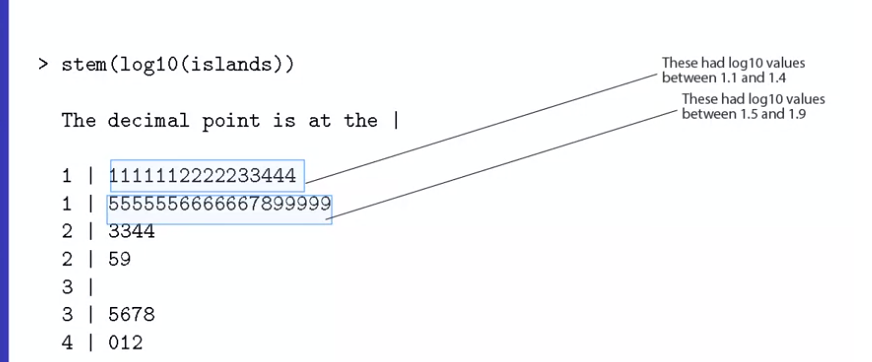

Dotcharts:
- simply display a data set, one point per dot
- ordering of the of the dot and labeling of the xes cna the display addtional information
- dotcharts show a complete data set and so have high data density
- may be impossible to construct/difficult to interpret for data sets with lots of points
- dotplot comparing grouped data:
  - for data sets in groups , you often want to display density information by group
  - if the size of the data permits, it diplayng the whole data is prefereble
  - add horizontal lines to depict means, medians
  - add vertical lines to depict variation, show confidence intervals interquartile ranges
  - jutter the points to avoid overplotting(jitter)

```
data(InsectSprays)
attch(omsectS[rays)
plot(c(0.5, 6.5), range(count))
SprayTypes <- unique(spray)
for (i in 1: length(sprayTypes)){
  y<- count[sparay == sprayType[i]]
  n <- sum(spray==sprayTypes[i])
  points(jitter(rep(i,n), amount=0.1),y)
  lines(i+c(0.12, 0.28), rep(mean(y),2), lwd=3)
  lines(rep(i+0.2, 2), mean(y)+ c(-1.96, 1.96)*sd(y)/sqrt(n))
}




Boxplot

- are useful for the same sort of display as the dot chart, but in instances where displaying the whole data set is not possible
- centerline of the boxes represents the median while the box edges correspond to the quartiles
- whiskers extend out to a constant times the IQR or the max value
- sometimes potential outliers are denoted y points beyond the whiskers
- also inveted by Yukey
- skenewss indicate d by centerline being near one of the box edges



Kernel density estmates
- kernel density estimates are essentially more modern version of histograms providing density estimates for continuous data
- observations are weighted according to a "kernal", in most cases a Gaussian density
- bandwidth- of the kernel effictively plays the role of the bin size for the histogram
  a. too low of a bandwidth yilds a too variable (jagged) measure of the density
  b. too high of a bandwidth oversmooths
the R functon density can be used to create KDEs

```
data(faithful)
d<- density(faithful$eruptions, bw="sj")
plot(d)
```



QQ plots:
- for quantile-quantile are extremely useful for comapring dato to a theorical distribution
- plot the empirical quantiles agains theorical quantiles
- most useful for diagnosting normality

Let $X_p$ be the p-th quantile from $N(\mu, \sigma^2)$
- then $P(X=<X)=p$
- clearly $P(Z=<\frac{x_p - \mu}{\sigma})= p$
- therefore $x_p = \mu + Z_p\sigma$ this should bot be news
- result quantiles from $N(\mu, \sigma^2)$ population should be linearly reloated to standard normal quantile
- a normal qq-plot the empirical quantiles against the theorical standard normal quantiles
- in R qqnorm for a normal QQ-plot and qqplot for qqplot aginst an arbitrary ditribution

Mosaic pLots:
- are useful for displaying contingency table data
- consider Fisher;s data regarding hair and eye color data for people from Cainthness

```
library(MASS)
data(caith)
caith
mosaicplot(caith, color=topo.colors(4), main="mosaic plot")

```

# Jacknofe:
- is a tool for estimating standard error and the bias of estimators
- as its name suggest, the jacknife is asmall, handly tool, in contrast to the boottrap, which is then the moral equivalent of a giant workshop fill of tools
- both the jackknife and the bootstrap involve resampling data, that is, repeatedly creatinf new data sets from the original data

- the Jackknife deletes each observation and calculates an estimate baseed on the remaining n-1 of them
- it uses this collection of estimates to do things like estimate the bias and the standard error
- note that estimating he bias and having a st.error are not needed for things like sample means, which we know are unbiased estimates of population means and what their st.errors are
---

- We'll consider the jackknife for univariate data
- let $X_1..X_n$ be a collection of data used to estimate a parameter $\theta$
- let $\hat{\theta}$ be the estimate based onthe full data set
- le $\hat{\theta_i}$ be the estimate of $\theta$ obtained by deleting observation i
- let $\bar{\theta}= 1/n \sum_{i=1}^n \hat{\theta_i}$

///

then the jacknife estimate of the bias is: $(n-1)(\abr{\theta}-\hat{\theta})$
- how far the average delete-one statemets is from the actial estimate
- the jackknife estimate of the st.error is
$[\frac{n-1}{n} \sum_{i=1}^n (\hat{\theta_i} - \bar{\theta})^2]^{1/2}$

the deviance of te delete -one estimates from the average delete-one estimate


Consider the data set of 630 measurements of gray matter volume for workers from a lead manufacturing plant
- the median gray matter volume is around 589 cubic centimeters
- we want to estimate the bias and st.error of the median

```
n <- length(gmVol)
theta <- median(gmVol)
jk <- sapply(1:n, function(i) median(gmVol[-i]))

thetaBar <- mean(jk)
biasEst <- (n-1)*(thetaBar- theta)
seEst <- sqrt((n-1)* mean((jk - thetaBar)^2))
```

```
# bootstrap package
library(bootstrap)
out<- jackknife(gmVol, median)
out$jack.se
out$jack.Bias
```
Both methods yield an estimated bias of 0 and a se of 9.94
-- odd little fact: the jacknife estimate of the bias for the median is always 0 when the number of observations is even- it has been shown that the jackknife is alinear approximation to the bootstrap
- generally do not use jackknife for sample quantiles like the median, as it has been shown to have some poor propertioes


Pseudo observatios:
- another interesting way to think about jk uses pseudo observations
- Let: $PseudoObs = n.\hat{\theta} - (n-1)\hat{\theta_i}$

- think of these as "whatever observation i contributes ot the estimate of $\theta$"
- note when $\hat{\theta}$ is the sample mean, the pseudo observations are the data themselves
- then the sample st.error of these observations is the previous jk estimated st.error
- the mean of these observations is a bias-corrected estimate of $\theta$





### Bootstrap
- is a tremendously useful tool for consstructing confidence intervals andcalculating st.errors for difficult statistics
- for example, how would one derive a confidence interval for the median?
- the bootstrap precedure follows from the so called bootstrap principle

- suppose that I have a statistic that estimates some popular parameter , but I don't know its ampling distribution
- the bootstrap principle suggest using the distribution defined by the data to approximate its sampling distribution

IUn practice:
- the bootstrap prionciple is always carried out using simulation
- we will cover only a feq aspects of bootstrap resampling
0 the general procedure follows by first simulating complete data sets from the observed data with replacement
  - this is approximately drwing from the sampling distribution of that statistic, at least as far as the data is able to approximate the true population distribution

- calculte the statistic for each simulated data set
- use the simulated statistics to either define a confidence interval or take the st.deviation to calculae a st.error


Bootstrapp procedure for calculating for the median from a data set of n obervations
- samplen observations with replacement from the observed data resulting in one simulated complete data set
- take the median of the simulated data st
- repeat these two steps B time, resulting in B simulated medians
- these medians are approximately draws from the sampling distribution of the median of n observations , therefore we can
  - draw a histogram of them
  - calculate their st.deviation to estimate the t.erro of the median
  - take the 2.5th and 97.5th percentile as a confidence interval for the median


  ```
  B <- 1000
  n <- length(gmVol)
  resamples <- matrix(sample(gmVol, n*B, repallce=True), N, n)
  medinas <- applyt (reasamples, 1, median)
  sd(medians)
  quantile(medians, c(0.025, 0.975))

  ```


Notes:
- the bootstrap is non-parametric
- however the teoretical arguments proving the validity of the bootstrap rely on large samples
- better percentile bootstrap conficdence intervals correct for bias
- there a lots of variation on bootstrap procedures, the book" AN introduction to the Bootstrap: by Efron and Tibshirani is agreat place to start for both boottrap and kk information



```
linrary (bootstrap)
stat <- function(x,i){median(x[i])}
boot.out <- boot(data=gmVol, statistic=stat, R=1000)
bvoot.ci(boot.out)
```